# Decision Tree

## Exercises
    Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

## Imports:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

import acquire
import prepare

from sklearn.model_selection import train_test_split
#import this for the decision tree!
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
titanic_df = acquire.get_titanic_data()

csv file found and loaded


In [3]:
titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [4]:
titanic_df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [5]:
# Clean the new dataset using the new function called prep_titanic
titanic_df = prepare.prep_titanic(titanic_df)

In [6]:
#split my data
train, validate, test = prepare.split_function(titanic_df, 'survived')

### 1a. What is your baseline prediction? 

In [7]:
#look at my train
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1


In [9]:
titanic_df.survived.value_counts().idxmax()

0

In [10]:
#set baseline
titanic_df['baseline']= titanic_df.survived.value_counts().idxmax()
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline
0,0,0,3,male,1,0,7.2500,S,0,1,0,1,0
1,1,1,1,female,1,0,71.2833,C,0,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1,0
3,3,1,1,female,1,0,53.1000,S,0,0,0,1,0
4,4,0,3,male,0,0,8.0500,S,1,1,0,1,0


> Baseline is No Survived

### 1b. What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 

In [8]:
#Find most common survived
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [11]:
#calculate baseline accuracy
# baseline_accuracy = (train.servived == 0)
baseline_accuracy = 329 / (329+205)
baseline_accuracy

0.6161048689138576

### 1c. When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [ ]:
#Dropped all the columns that contained a type 'object'
train = train.select_dtypes(exclude=['object'])
train

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,0,0,7.8958,1,1,0,0
380,380,1,1,0,0,227.5250,1,0,0,0
492,492,0,1,0,0,30.5000,1,1,0,1
55,55,1,1,0,0,35.5000,1,1,0,1
243,243,0,3,0,0,7.1250,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
695,695,0,2,0,0,13.5000,1,1,0,1
128,128,1,3,1,1,22.3583,0,0,0,0
636,636,0,3,0,0,7.9250,1,1,0,1
222,222,0,3,0,0,8.0500,1,1,0,1


In [ ]:
train.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,0,0,7.8958,1,1,0,0
380,380,1,1,0,0,227.5250,1,0,0,0
492,492,0,1,0,0,30.5000,1,1,0,1
55,55,1,1,0,0,35.5000,1,1,0,1
243,243,0,3,0,0,7.1250,1,1,0,1


In [ ]:
# 'X' variables are DataFrames
# X will be our features
X_train = train.iloc[:]
X_train.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,0,0,7.8958,1,1,0,0
380,380,1,1,0,0,227.5250,1,0,0,0
492,492,0,1,0,0,30.5000,1,1,0,1
55,55,1,1,0,0,35.5000,1,1,0,1
243,243,0,3,0,0,7.1250,1,1,0,1


In [ ]:
#repeat for validate and test
X_validate = validate.iloc[:]
print(X_validate)
X_test = test.iloc[:]
print(X_test)

     passenger_id  survived  pclass     sex  sibsp  parch     fare embarked  \
176           176         0       3    male      3      1  25.4667        S   
372           372         0       3    male      0      0   8.0500        S   
678           678         0       3  female      1      6  46.9000        S   
778           778         0       3    male      0      0   7.7375        Q   
463           463         0       2    male      0      0  13.0000        S   
..            ...       ...     ...     ...    ...    ...      ...      ...   
622           622         1       3    male      1      1  15.7417        C   
302           302         0       3    male      0      0   0.0000        S   
518           518         1       2  female      1      0  26.0000        S   
765           765         1       1  female      1      0  77.9583        S   
837           837         0       3    male      0      0   8.0500        S   

     alone  sex_male  embarked_Q  embarked_S  
176 

In [ ]:
# Set a target
target = 'survived'

In [ ]:
# 'y' variable are series
y_train = train[target]
y_train

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

In [ ]:
# 'y' variable are series
# validate and test
y_validate = validate[target]
y_test = test[target]

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [ ]:
# Making the object
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [ ]:
# fit the object
# building our model on our train values
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Transform the object
# score on my train data
clf.score(X_train, y_train)

1.0

> This model predicts the survival 100%!

In [39]:
clf.predict(X_train)

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [28]:
clf.classes_.astype(str)

array(['0', '1'], dtype='<U21')

In [40]:
clf.score(X_train, y_train)

1.0

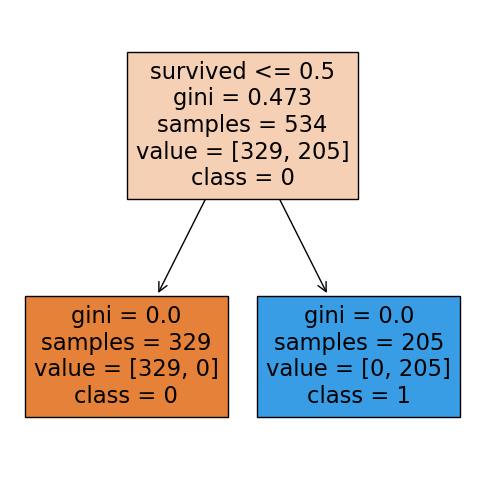

In [28]:
#see the tree that was built
#plot_tree
plt.figure(figsize=(6,6))
plot_tree(clf, #our fitted object
         feature_names=X_train.columns, #puts in our features for the questions
          class_names=clf.classes_.astype(str), #enters the selected class
          filled=True #colors our leaves and branches based on the class
         )
plt.show()

In [30]:
X_validate.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
176,176,0,3,male,3,1,25.4667,S,0,1,0,1
372,372,0,3,male,0,0,8.0500,S,1,1,0,1
678,678,0,3,female,1,6,46.9000,S,0,0,0,1
778,778,0,3,male,0,0,7.7375,Q,1,1,1,0
463,463,0,2,male,0,0,13.0000,S,1,1,0,1


### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [33]:
#Dropped all the columns that contained a type 'object'
X_validate = X_validate.select_dtypes(exclude=['object'])
X_validate

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
176,176,0,3,3,1,25.4667,0,1,0,1
372,372,0,3,0,0,8.0500,1,1,0,1
678,678,0,3,1,6,46.9000,0,0,0,1
778,778,0,3,0,0,7.7375,1,1,1,0
463,463,0,2,0,0,13.0000,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
622,622,1,3,1,1,15.7417,0,1,0,0
302,302,0,3,0,0,0.0000,1,1,0,1
518,518,1,2,1,0,26.0000,0,0,0,1
765,765,1,1,1,0,77.9583,0,0,0,1


In [43]:
clf.score(X_validate, y_validate)

1.0

In [44]:
y_pred = clf.predict(X_train)

In [47]:
# confusion matrix

conf = confusion_matrix(y_train, y_pred)

NameError: name 'confusion_matrix' is not defined

### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

### 5. Run through steps 2-4 using a different max_depth value.

### 6. Which model performs better on your in-sample data?

### 7. Which model performs best on your out-of-sample data, the validate set?